# Analysis for full Ramsey Cycle

In [28]:
import numpy as np
import pandas as pd
from ipywidgets import *
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob

fold = 'out/'


In [29]:
endFiles = glob.glob(fold+'*neutronend.out')
df_end_list = (pd.read_csv(endFile, sep=' ') for endFile in endFiles)
df_end = pd.concat(df_end_list, ignore_index=True)
df_end['particle'] = df_end['particle'] + 200*df_end['jobnumber']
# df_end.head()
# df_end.columns

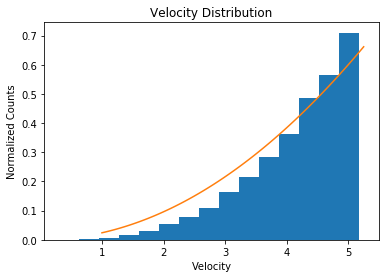

In [30]:
df_end['vmag'] = (df_end['vxstart']**2+df_end['vystart']**2+df_end['vzstart']**2)**.5

fig, ax = plt.subplots()

ax.hist(df_end['vmag'],bins=15, density=True)

ax.set_title('Velocity Distribution')
ax.set_xlabel('Velocity')
ax.set_ylabel('Normalized Counts')

x = np.linspace(1,5.25,num=100)
y = (3/125) * x**2

ax.plot(x,y)

plt.show()

# print(df_end.vxstart)



In [31]:
df_end_stored = df_end[df_end.stopID==-1]
print('{} particles stored out of {}'.format(len(df_end_stored), len(df_end)))
df_end_stored.head()
# df_end_stored.Szstart
# print(df_end_stored[['xstart','ystart','zstart']])

7017 particles stored out of 10000


,jobnumber,particle,tstart,xstart,ystart,zstart,vxstart,vystart,vzstart,polstart,...,solidend,stopID,Nspinflip,spinflipprob,Nhit,Nstep,trajlength,Hmax,wL,vmag
0,0,1,0,1.899344,0.015927,0.229765,-1.304446,0.313574,1.882564,-1,...,1,-1,0,0,390,668,56.468228,5.148542e-08,509.259020,2.311700
1,0,2,0,1.903232,0.029035,0.250713,3.816144,1.210311,-2.632487,-1,...,1,-1,0,0,842,1732,101.275089,1.457009e-07,674.063369,4.791429
2,0,3,0,1.903469,0.020682,0.221680,0.721965,-1.284667,-2.575035,-1,...,1,-1,0,0,467,822,66.977618,6.873377e-08,616.901223,2.966885
3,0,4,0,1.905944,0.000732,0.251852,4.100624,1.121946,-2.363597,-1,...,1,-1,0,0,949,2347,101.643007,1.494906e-07,1048.269630,4.864203
4,0,5,0,1.902203,-0.009238,0.251726,1.561978,-1.616759,4.651908,-1,...,1,-1,0,0,847,1156,109.011868,1.653338e-07,552.220710,5.166617


In [32]:
spinFiles = glob.glob(fold+'*neutronspin.out')
df_spin_list = (pd.read_csv(spinFile, sep=' ') for spinFile in spinFiles)
df_spin = pd.concat(df_spin_list, ignore_index=True)
df_spin['particle'] = df_spin['particle'] + 200*df_spin['jobnumber']

df_spin['Bmag']=(df_spin.Bx**2+df_spin.By**2+df_spin.Bz**2)**.5
# df_spin.head()
# df_spin[df_spin.t==0][['Bx','By','Bz']]
print(df_spin.columns)

Index(['jobnumber', 'particle', 't', 'x', 'y', 'z', 'Sx', 'Sy', 'Sz', 'Wx',
       'Wy', 'Wz', 'Bx', 'By', 'Bz', 'Bmag'],
      dtype='object')


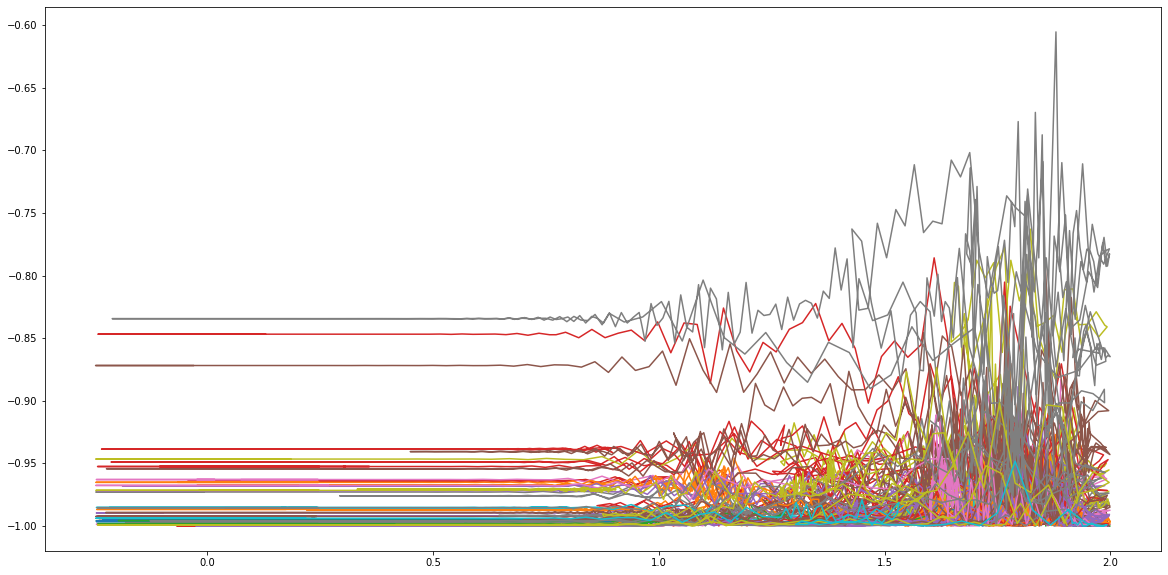

In [33]:
plt.figure(figsize=(20,10))

for i in range(20):
    df_spin_1 = df_spin[df_spin['particle']==df_end_stored['particle'].unique()[i]]

    plt.plot(df_spin_1['x'], df_spin_1['Sz'])

plt.show()

In [34]:
df_spin = df_spin[df_spin.particle.isin(df_end_stored.particle)]

df_spin['normB'] =  np.linalg.norm( df_spin[['Bx','By','Bz']] )

df_spin['polarization'] = (df_spin['Sx']*df_spin['Bx'] + df_spin['Sy']*df_spin['By'] + df_spin['Sz']*df_spin['Bz']) / df_spin['normB']

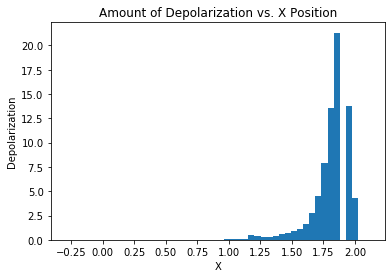

In [35]:
fig, ax = plt.subplots(1)

ax.set_title('Amount of Depolarization vs. X Position')
ax.set_xlabel('X')
ax.set_ylabel('Depolarization')
ax.hist(df_spin['x'],weights=abs((df_spin['particle'].diff()-1)*df_spin['polarization'].diff().fillna(0)), bins=50, )
ax.ticklabel_format(style='sci',useOffset=False)
ax.set_xticks(np.arange(-.25,2.25,.25))

plt.show()

In [36]:
snapFiles = glob.glob(fold+'*neutronsnapshot.out')
df_snap_list = (pd.read_csv(snapFile, sep=' ') for snapFile in snapFiles)
df_snap = pd.concat(df_snap_list, ignore_index=True)
df_snap['particle'] = df_snap['particle'] + 200*df_snap['jobnumber']
df_snap['vmag'] = df_snap.apply(lambda row: np.linalg.norm([row['vxend'],row['vyend'],row['vzend']]), axis=1)

df_snap.columns
# df_snap.tail()[['particle','xend','yend','zend','polend','Bend']]

Index(['jobnumber', 'particle', 'tstart', 'xstart', 'ystart', 'zstart',
       'vxstart', 'vystart', 'vzstart', 'polstart', 'Sxstart', 'Systart',
       'Szstart', 'Hstart', 'Estart', 'Bstart', 'Ustart', 'solidstart', 'tend',
       'xend', 'yend', 'zend', 'vxend', 'vyend', 'vzend', 'polend', 'Sxend',
       'Syend', 'Szend', 'Hend', 'Eend', 'Bend', 'Uend', 'solidend', 'stopID',
       'Nspinflip', 'spinflipprob', 'Nhit', 'Nstep', 'trajlength', 'Hmax',
       'wL', 'vmag'],
      dtype='object')

-0.9934654777774495 -0.9386669979694323 -0.9471394775894546


Text(0, 0.5, 'Average Spin')

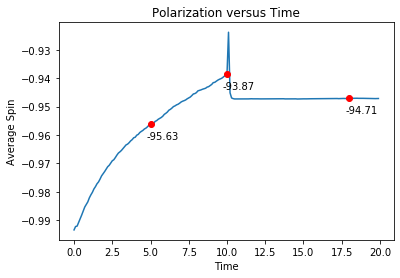

In [37]:
df_snap = df_snap[df_snap.particle.isin(df_end_stored.particle)]
snapTimes = df_snap['tend'].unique()
snapPol = np.array([df_snap[df_snap['tend'] == tUni]['Szend'].mean() for tUni in snapTimes])

half_index = int(len(snapPol)/2)
print(snapPol[0], snapPol[half_index], snapPol[-1])

fig, ax = plt.subplots()

ax.plot(snapTimes,snapPol)
index_list = [int(half_index/2),half_index,-int(half_index/5)]

for i in index_list:
    ax.plot(snapTimes[i],snapPol[i],'ro')
    
    ax.annotate('{:.2f}'.format(snapPol[i]*100),
        (snapTimes[i],snapPol[i]),
        textcoords = 'offset points',
        ha = 'center',
        xytext = (12,-15)
    )

# ax.ticklabel_format(style='sci',useOffset=False)
ax.set_title('Polarization versus Time')
ax.set_xlabel('Time')
ax.set_ylabel('Average Spin')

In [38]:
# Show final position of particles

# fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
# ax.plot(df_snap['xend'],df_snap['yend'],df_snap['zend'],'bo')
# ax.set_xlim3d(-.4, 3)
# ax.set_ylim3d(-1.7,1.7)
# ax.set_zlim3d(-1.7,1.7)
# plt.show()

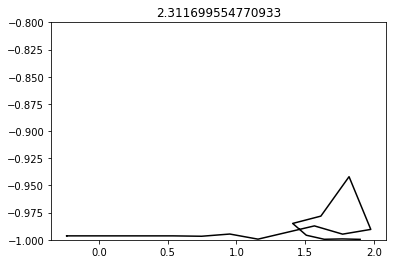

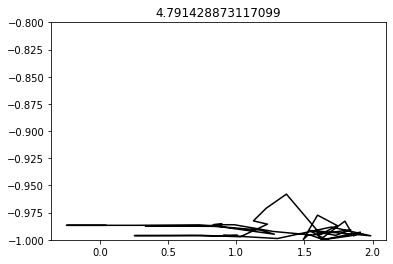

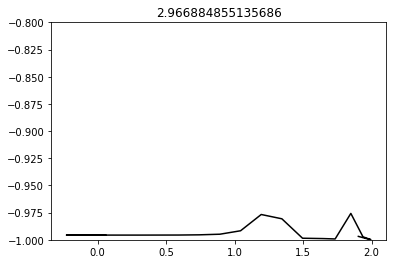

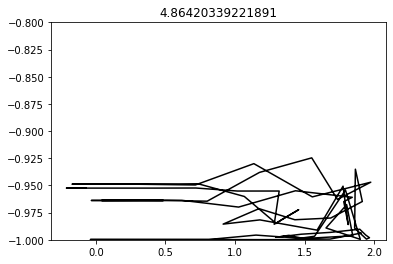

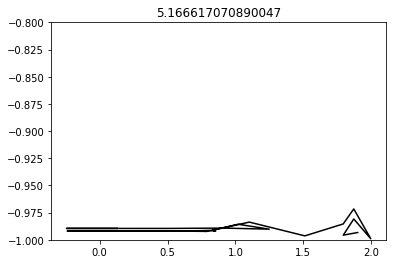

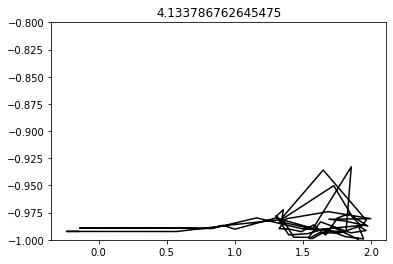

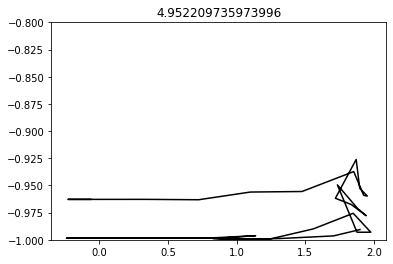

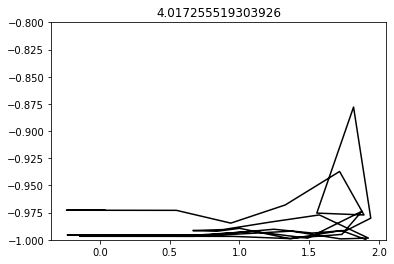

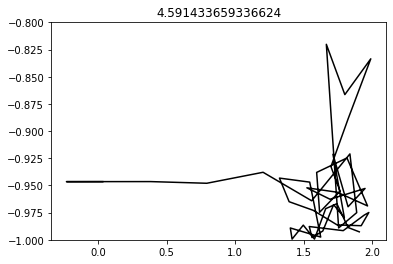

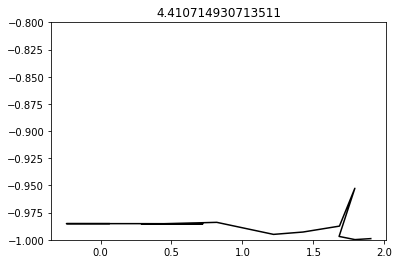

In [39]:
# Plot snapshots for spin of stored particle

for i in range(10):
    df_snap_1=df_snap[df_snap['particle']==df_end_stored.iloc[i].particle]
    fig, ax = plt.subplots()
    ax.plot(df_snap_1['xend'],df_snap_1['Szend'], 'k')
    ax.set_ylim(-1,-.8)
    ax.ticklabel_format(style='sci',useOffset=False)
    ax.set_title('{}'.format(df_snap_1.loc[:,'vmag'].iloc[0]))

plt.show()


6581 6581


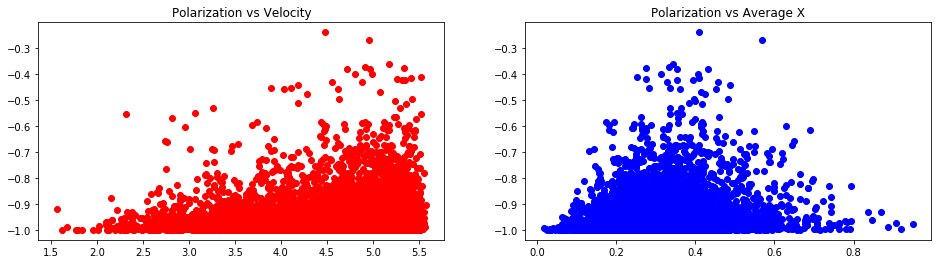

In [40]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

data_0 = df_snap[['vmag','Szend']][df_snap['tend']==df_snap['tend'].max()]
ax[0].set_title('Polarization vs Velocity')
ax[0].plot(data_0['vmag'],data_0['Szend'],'ro')


x_mean = df_snap[['particle','xend']].groupby(['particle']).mean()
data_1 = df_snap[['particle','Szend']][df_snap['tend']==df_snap['tend'].max()].join(x_mean, on='particle')

ax[1].set_title('Polarization vs Average X')
ax[1].plot(data_1['xend'],data_1['Szend'],'bo')

print(len(data_0), len(data_1))

plt.show()